In [25]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
PROJECT_DIRECTORY = '/Users/duncan/Projects/intrinsic_alignments/'

# load galaxy catalog

In [26]:
# get table of halo properties
from astropy.table import Table
filepath = PROJECT_DIRECTORY+'data/MB2_subfind_z_0.06.hdf5'
data = Table.read(filepath, path='hydro_full')
for name in data.dtype.names:
    print(name)

# convert some properties to standard units
data['halos.m_star'] = data['halos.m_star']*10**10
data['halos.m_dm'] = data['halos.m_dm'] * 10.0**10.0
data['halos.m_bh'] = data['halos.m_bh'] * 10.0**10.0

data['halos.x'] = data['halos.x']/1000.0
data['halos.y'] = data['halos.y']/1000.0
data['halos.z'] = data['halos.z']/1000.0

data['groups.x'] = data['groups.x']/1000.0
data['groups.y'] = data['groups.y']/1000.0
data['groups.z'] = data['groups.z']/1000.0

Lbox = np.array([100.0,100.0,100.0])
dm_particle_mass = 1.1*10**7 

halos.subfindId
halos.central
halos.mass
halos.vdisp
halos.vcirc
halos.rcirc
halos.m_gas
halos.m_dm
halos.m_star
halos.m_bh
halos.x
halos.y
halos.z
halos.vx
halos.vy
halos.vz
groups.groupId
groups.subfindId
groups.mass
groups.m_gas
groups.m_dm
groups.m_star
groups.m_bh
groups.x
groups.y
groups.z
groups.vx
groups.vy
groups.vz
prop.sfr
prop.btr
prop.SDSS_g
prop.SDSS_i
prop.SDSS_r
prop.SDSS_u
prop.SDSS_z
shapesDM.q3d
shapesDM.s3d
shapesDM.q2d
shapesDM.a3d_x
shapesDM.a3d_y
shapesDM.a3d_z
shapesDM.b3d_x
shapesDM.b3d_y
shapesDM.b3d_z
shapesDM.c3d_x
shapesDM.c3d_y
shapesDM.c3d_z
shapesDM.a2d_x
shapesDM.a2d_y
shapesDM.b2d_x
shapesDM.b2d_y
shapesStar.q3d
shapesStar.s3d
shapesStar.q2d
shapesStar.a3d_x
shapesStar.a3d_y
shapesStar.a3d_z
shapesStar.b3d_x
shapesStar.b3d_y
shapesStar.b3d_z
shapesStar.c3d_x
shapesStar.c3d_y
shapesStar.c3d_z
shapesStar.a2d_x
shapesStar.a2d_y
shapesStar.b2d_x
shapesStar.b2d_y
tid500.a_x
tid500.a_y
tid500.a_z
tid500.b_x
tid500.b_y
tid500.b_z
tid500.c_x
tid500.c_y
tid500.

# convert some quantities

In [27]:
print("number of galaxies: ", len(data))

# check centrals and satellite

centrals = (data['halos.central']==1)
satellites = (data['halos.central']==0)

print("satellite fraction: ", np.sum(satellites)/len(data))

# get index of central galaxy
from halotools.utils import crossmatch
central_indices = (np.arange(0,len(data)).astype('int'))[centrals]
inds1, inds2 = crossmatch(data['groups.groupId'], data['groups.groupId'][centrals])

index_of_central = np.arange(0,len(data)).astype('int')
index_of_central[inds1] = central_indices[inds2]

number of galaxies:  4633801
satellite fraction:  0.254152908163


In [28]:
# get galaxy/halo coordinates in halotools format
coords = np.vstack((data['halos.x'],
                    data['halos.y'],
                    data['halos.z'])).T

# caclulate ellipticites and axis ratios
q_dm = data['shapesDM.q3d']
e_dm = (1.0-q_dm)/(1.0+q_dm**2)
s_dm = data['shapesDM.s3d']

q_gal = data['shapesStar.q3d']
e_gal = (1.0-q_gal)/(1.0+q_gal**2)
s_gal = data['shapesStar.s3d']

q_dm = data['shapesDM.q2d']
proj_e_dm = (1.0-q_dm)/(1.0+q_dm**2)

q_gal = data['shapesStar.q2d']
proj_e_gal = (1.0-q_gal)/(1.0+q_gal**2)

# calculate orientations
orientation_dm = np.vstack((data['shapesDM.a3d_x'],
                            data['shapesDM.a3d_y'],
                            data['shapesDM.a3d_z'])).T

orientation_dm_2 = np.vstack((data['shapesDM.c3d_x'],
                            data['shapesDM.c3d_y'],
                            data['shapesDM.c3d_z'])).T

orientation_gal = np.vstack((data['shapesStar.a3d_x'],
                             data['shapesStar.a3d_y'],
                             data['shapesStar.a3d_z'])).T

orientation_gal_2 = np.vstack((data['shapesStar.c3d_x'],
                             data['shapesStar.c3d_y'],
                             data['shapesStar.c3d_z'])).T

proj_orientation_dm = np.vstack((data['shapesDM.a2d_x'],
                                 data['shapesDM.a2d_y'])).T

proj_orientation_gal = np.vstack((data['shapesStar.a2d_x'],
                                  data['shapesStar.a2d_y'])).T

In [29]:
from intrinsic_alignments.ia_models.ia_model_components import RadialSatelliteAlignment
sat_alignment_model = RadialSatelliteAlignment(Lbox=Lbox)
# satellite position orintations

halo_x = data['halos.x'][index_of_central]
halo_y = data['halos.y'][index_of_central]
halo_z = data['halos.z'][index_of_central]
x = data['halos.x']
y = data['halos.y']
z = data['halos.z']

cen_sat_direction = sat_alignment_model.get_radial_vector(x=x, y=y, z=z,
                                                          halo_x=halo_x,
                                                          halo_y=halo_y,
                                                          halo_z=halo_z)

dx = cen_sat_direction[:,0]
dy = cen_sat_direction[:,1]
dz = cen_sat_direction[:,2]
r = np.sqrt(dx**2 + dy**2 + dz**2)

In [30]:
N = len(data)
random_orientations = np.random.random((N,3))*2.0 - 1.0

In [31]:
from halotools.utils import normalized_vectors, angles_between_list_of_vectors
from intrinsic_alignments.ia_models.utils import symmetrize_angular_distribution

In [32]:
alignment_vectors = orientation_dm
alignment_vectors[satellites] = cen_sat_direction[satellites]

theta_misalignment = angles_between_list_of_vectors(alignment_vectors, orientation_gal)
theta_misalignment = symmetrize_angular_distribution(theta_misalignment)
theta_misalignment = np.nan_to_num(theta_misalignment)

/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:88: RuntimeWarning: invalid value encountered in true_divide
  return vectors/elementwise_norm(vectors).reshape((npts, -1))
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:130: RuntimeWarning: invalid value encountered in greater
  mask1 = (dot > 1) & (dot < 1 + tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:130: RuntimeWarning: invalid value encountered in less
  mask1 = (dot > 1) & (dot < 1 + tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:132: RuntimeWarning: invalid value encountered in less
  mask2 = (dot < -1) & (dot > -1 - tol)
/Users/duncan/Code/halotools/halotools/utils/matrix_operations_3d.py:132: RuntimeWarning: invalid value encountered in greater
  mask2 = (dot < -1) & (dot > -1 - tol)


In [33]:
alignment_vectors = orientation_dm_2
alignment_vectors[satellites] = cen_sat_direction[satellites]

theta_misalignment_2 = angles_between_list_of_vectors(alignment_vectors, orientation_gal_2)
theta_misalignment_2 = symmetrize_angular_distribution(theta_misalignment_2)
theta_misalignment_2 = np.nan_to_num(theta_misalignment_2)

[ 0.82821515]
[ 0.45790297]


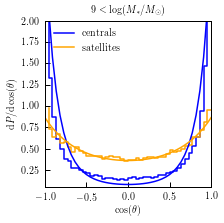

In [34]:
from intrinsic_alignments.ia_models.ia_model_components import DimrothWatson, inverse_alignment_strenth
dist = DimrothWatson()

mask = (data['halos.m_star']>10**9) & centrals

costheta_bins = np.linspace(-1.0, 1.0, 45)
costheta_bin_centers = (costheta_bins[:-1]+costheta_bins[1:])/2.0
x = np.cos(theta_misalignment[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_1 = counts/np.sum(counts)/np.diff(costheta_bins)

k1 = dist.fit(x, floc=0, fscale=1)[0]
f1 = dist.pdf(costheta_bins, k=k1)
print(inverse_alignment_strenth(k1))

mask = (data['halos.m_star']>10**9) & satellites

costheta_bins = np.linspace(-1.0, 1.0, 45)
x = np.cos(theta_misalignment[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_2 = counts/np.sum(counts)/np.diff(costheta_bins)

k2 = dist.fit(x, floc=0, fscale=1)[0]
f2 = dist.pdf(costheta_bins, k=k2)
print(inverse_alignment_strenth(k2))

fig  = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.step(costheta_bins[1:], normalized_counts_1, color='blue')
p2, = plt.step(costheta_bins[1:], normalized_counts_2, color='orange')
plt.plot(costheta_bins, f1, color='blue')
plt.plot(costheta_bins, f2, color='orange')
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$\mathrm{d}P/\mathrm{d}\cos(\theta)$')
plt.ylim([0.05,2])
plt.xlim([-1,1])
plt.legend([p1,p2], ['centrals', 'satellites'], frameon=False, fontsize=10, loc='upper left')
plt.title(r'$9<\log(M_*/M_{\odot})$')
plt.show()

filename = "galaxy_misalignment_dist.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/galaxy_shape_correlations/figures/'+filename, dpi=250)

[ 0.8899107]
[-0.50636999]


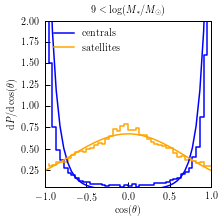

In [35]:
from intrinsic_alignments.ia_models.ia_model_components import DimrothWatson, inverse_alignment_strenth
dist = DimrothWatson()

mask = (data['halos.m_star']>10**9) & centrals

costheta_bins = np.linspace(-1.0, 1.0, 45)
costheta_bin_centers = (costheta_bins[:-1]+costheta_bins[1:])/2.0
x = np.cos(theta_misalignment_2[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_1 = counts/np.sum(counts)/np.diff(costheta_bins)

k1 = dist.fit(x, floc=0, fscale=1)[0]
f1 = dist.pdf(costheta_bins, k=k1)
print(inverse_alignment_strenth(k1))

mask = (data['halos.m_star']>10**9) & satellites

costheta_bins = np.linspace(-1.0, 1.0, 45)
x = np.cos(theta_misalignment_2[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_2 = counts/np.sum(counts)/np.diff(costheta_bins)

k2 = dist.fit(x, floc=0, fscale=1)[0]
f2 = dist.pdf(costheta_bins, k=k2)
print(inverse_alignment_strenth(k2))

fig  = plt.figure(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.step(costheta_bins[1:], normalized_counts_1, color='blue')
p2, = plt.step(costheta_bins[1:], normalized_counts_2, color='orange')
plt.plot(costheta_bins, f1, color='blue')
plt.plot(costheta_bins, f2, color='orange')
plt.xlabel(r'$\cos(\theta)$')
plt.ylabel(r'$\mathrm{d}P/\mathrm{d}\cos(\theta)$')
plt.ylim([0.05,2])
plt.xlim([-1,1])
plt.legend([p1,p2], ['centrals', 'satellites'], frameon=False, fontsize=10, loc='upper left')
plt.title(r'$9<\log(M_*/M_{\odot})$')
plt.show()

filename = "galaxy_misalignment_dist.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/galaxy_shape_correlations/figures/'+filename, dpi=250)

## halo mass dependence

In [79]:
from intrinsic_alignments.halo_shape_correlations.utils import binned_bootstrap_1d

Nboot = 5

# check for halo mass dependence 
mbins = np.logspace(10.0,14.0,20)
mbin_centers = (mbins[:-1]+mbins[1:])/2.0

mask = centrals
x = np.cos(theta_misalignment)

statisic = lambda x: inverse_alignment_strenth(dist.fit(x, floc=0, fscale=1)[0])
p, err_p = binned_bootstrap_1d(data['halos.mass'][mask], x[mask], mbins,
                               statistic=statisic, Nboot=Nboot)

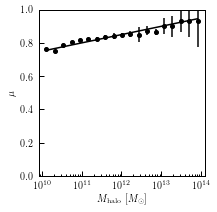

In [80]:
from intrinsic_alignments.ia_models.ia_model_components import HaloMassCentralAlignmentStrength
central_aligment_strength = HaloMassCentralAlignmentStrength()

fig, ax = plt.subplots(1,1,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax.errorbar(mbin_centers, p, yerr=5*err_p, fmt='o', ms=4, color='black')
plt.plot(mbin_centers, central_aligment_strength.alignment_strength_mass_dependence(mbin_centers), '-', color='black')
ax.set_ylim([0,1])
ax.set_xscale('log')
ax.set_xlabel(r'$M_{\rm halo}~[M_{\odot}]$')
ax.set_ylabel(r'$\mu$')
plt.show()

filename = "measured_halo_mass_central_alignment_strength.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/galaxy_shape_correlations/figures/'+filename, dpi=250)

In [22]:
from intrinsic_alignments.halo_shape_correlations.utils import binned_bootstrap_1d

Nboot = 2

# check for halo mass dependence 
mbins = np.logspace(9.0,12.0,15)
mbin_centers = (mbins[:-1]+mbins[1:])/2.0

mask = centrals
x = np.cos(theta_misalignment)

statisic = lambda x: inverse_alignment_strenth(dist.fit(x, floc=0, fscale=1)[0])
p, err_p = binned_bootstrap_1d(data['halos.m_star'][mask], x[mask], mbins,
                               statistic=statisic, Nboot=Nboot)

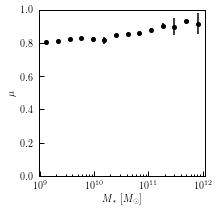

In [23]:
fig, ax = plt.subplots(1,1,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax.errorbar(mbin_centers, p, yerr=5*err_p, fmt='o', ms=4, color='black')
ax.set_ylim([0,1])
ax.set_xscale('log')
ax.set_xlabel(r'$M_{*}~[M_{\odot}]$')
ax.set_ylabel(r'$\mu$')
plt.show()

filename = "measured_stellar_mass_central_alignment_strength.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/galaxy_shape_correlations/figures/'+filename, dpi=250)

# fit two population alignments

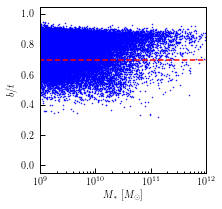

In [37]:
fig, ax = plt.subplots(1,1,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(data['halos.m_star'], data['prop.btr'], '.', ms=1, alpha=1, color='blue')
plt.plot([10,10**13],[0.7,0.7], '--', color='red')
plt.xscale('log')
plt.xlim([10**9,10**12])
plt.xlabel(r'$M_{*}~[M_{\odot}]$')
plt.ylabel(r'$b/t$')
plt.show()

disks = data['prop.btr']<0.7
ellipticals = data['prop.btr']>0.7

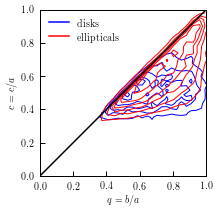

In [81]:
fig, ax = plt.subplots(1,1,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
mask = (data['halos.m_star']>10.0**9.0) & disks
counts, xbins, ybins=np.histogram2d(q_gal[mask], s_gal[mask], bins=25)
plt.contour(counts.transpose(),extent=[xbins.min(),xbins.max(),
    ybins.min(),ybins.max()],linewidths=1,colors='blue',
    linestyles='solid')
mask = (data['halos.m_star']>10.0**9.0) & ellipticals
counts, xbins, ybins=np.histogram2d(q_gal[mask], s_gal[mask], bins=25)
plt.contour(counts.transpose(),extent=[xbins.min(),xbins.max(),
    ybins.min(),ybins.max()],linewidths=1,colors='red',
    linestyles='solid')
plt.plot([0,1], [0,1], color='black')
plt.xlim([0,1])
plt.ylim([0,1])
p1, = plt.plot([-1,-1],[-1,-1], color='blue')
p2, = plt.plot([-1,-1],[-1,-1], color='red')
plt.legend([p1,p2], ['disks','ellipticals'], loc='upper left', fontsize=10, frameon=False)
plt.xlabel(r'$q=b/a$')
plt.ylabel(r'$c=c/a$')
plt.show()

filename = "disk_elliptical_axis_ratios.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/galaxy_shape_correlations/figures/'+filename, dpi=250)

In [82]:
from intrinsic_alignments.halo_shape_correlations.utils import binned_bootstrap_1d

Nboot = 5

# check for halo mass dependence 
mbins = np.logspace(10.0,13.0,15)
mbin_centers = (mbins[:-1]+mbins[1:])/2.0

mask = centrals & disks
x = np.cos(theta_misalignment_2)

statisic = lambda x: inverse_alignment_strenth(dist.fit(x, floc=0, fscale=1)[0])
p_1, err_p_1 = binned_bootstrap_1d(data['halos.mass'][mask], x[mask], mbins,
                                   statistic=statisic, Nboot=Nboot)

In [83]:
mask = centrals & ellipticals
x = np.cos(theta_misalignment)

statisic = lambda x: inverse_alignment_strenth(dist.fit(x, floc=0, fscale=1)[0])
p_2, err_p_2 = binned_bootstrap_1d(data['halos.mass'][mask], x[mask], mbins,
                                   statistic=statisic, Nboot=Nboot)

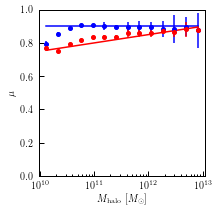

In [84]:
from intrinsic_alignments.ia_models.ia_model_components import HaloMassCentralAlignmentStrength
central_elliptical_aligment_strength = HaloMassCentralAlignmentStrength()
central_disk_aligment_strength = HaloMassCentralAlignmentStrength(central_alignment_a=0.0, central_alignment_gamma=0.9)

fig, ax = plt.subplots(1,1,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax.errorbar(mbin_centers, p_1, yerr=5*err_p_1, fmt='o', ms=4, color='blue')
plt.plot(mbin_centers, central_disk_aligment_strength.alignment_strength_mass_dependence(mbin_centers), '-', color='blue')
ax.errorbar(mbin_centers, p_2, yerr=5*err_p_2, fmt='o', ms=4, color='red')
plt.plot(mbin_centers, central_elliptical_aligment_strength.alignment_strength_mass_dependence(mbin_centers), '-', color='red')
ax.set_ylim([0,1])
ax.set_xscale('log')
ax.set_xlabel(r'$M_{\rm halo}~[M_{\odot}]$')
ax.set_ylabel(r'$\mu$')
plt.show()

filename = "measured_halo_mass_central_disk_elliptical_alignment_strength.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/galaxy_shape_correlations/figures/'+filename, dpi=250)

[ 0.90431241]
[-0.14526521]
[ 0.84262493]
[ 0.5031857]


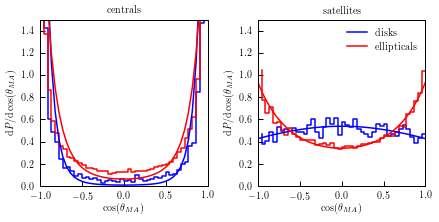

In [78]:
mask = (data['halos.m_star']>10**9) & centrals & disks

costheta_bins = np.linspace(-1.0, 1.0, 45)
costheta_bin_centers = (costheta_bins[:-1]+costheta_bins[1:])/2.0
x = np.cos(theta_misalignment_2[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_1 = counts/np.sum(counts)/np.diff(costheta_bins)

k1 = dist.fit(x, floc=0, fscale=1)[0]
f1 = dist.pdf(costheta_bins, k=k1)
print(inverse_alignment_strenth(k1))


mask = (data['halos.m_star']>10**9) & satellites & disks

costheta_bins = np.linspace(-1.0, 1.0, 45)
x = np.cos(theta_misalignment_2[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_2 = counts/np.sum(counts)/np.diff(costheta_bins)

k2 = dist.fit(x, floc=0, fscale=1)[0]
f2 = dist.pdf(costheta_bins, k=k2)
print(inverse_alignment_strenth(k2))


mask = (data['halos.m_star']>10**9) & centrals & ellipticals

costheta_bins = np.linspace(-1.0, 1.0, 45)
costheta_bin_centers = (costheta_bins[:-1]+costheta_bins[1:])/2.0
x = np.cos(theta_misalignment[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_3 = counts/np.sum(counts)/np.diff(costheta_bins)

k3 = dist.fit(x, floc=0, fscale=1)[0]
f3 = dist.pdf(costheta_bins, k=k3)
print(inverse_alignment_strenth(k3))


mask = (data['halos.m_star']>10**9) & satellites & ellipticals

costheta_bins = np.linspace(-1.0, 1.0, 45)
x = np.cos(theta_misalignment[mask])
counts = np.histogram(x, bins=costheta_bins)[0]
normalized_counts_4 = counts/np.sum(counts)/np.diff(costheta_bins)

k4 = dist.fit(x, floc=0, fscale=1)[0]
f4 = dist.pdf(costheta_bins, k=k4)
print(inverse_alignment_strenth(k4))

dist = DimrothWatson()
f1 = dist.pdf(costheta_bins, k=k1)
f2 = dist.pdf(costheta_bins, k=k2)
f3 = dist.pdf(costheta_bins, k=k3)
f4 = dist.pdf(costheta_bins, k=k4)

# plot results
x = np.linspace(-1,1,1000)
fig, axes = plt.subplots(1,2,figsize=(6.3,3.3))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.2, top=0.9, wspace=0.3)

ax = axes[0]
ax.set_title('centrals')
p1, = ax.step(costheta_bins[1:], normalized_counts_1, color='blue') # central disk
p2, = ax.step(costheta_bins[1:], normalized_counts_3, color='red') # central elliptical
ax.plot(costheta_bins, f1, color='blue')
ax.plot(costheta_bins, f3, color='red')
ax.set_ylim([0,1.5])
ax.set_xlim([-1,1])
ax.set_xlabel(r'$\cos(\theta_{MA})$')
ax.set_ylabel(r'$\mathrm{d}P/\mathrm{d}\cos(\theta_{MA})$')

ax = axes[1]
ax.set_title('satellites')
p1, = ax.step(costheta_bins[1:], normalized_counts_2, color='blue') # satellite disk
p2, = ax.step(costheta_bins[1:], normalized_counts_4, color='red') # satellite elliptical
ax.plot(costheta_bins, f2, color='blue')
ax.plot(costheta_bins, f4, color='red')
ax.set_ylim([0,1.5])
ax.set_xlim([-1,1])
ax.set_xlabel(r'$\cos(\theta_{MA})$')
ax.set_ylabel(r'$\mathrm{d}P/\mathrm{d}\cos(\theta_{MA})$')
ax.legend([p1,p2],['disks','ellipticals'], loc='upper right', fontsize=10, frameon=False)

plt.show()

filename = "central_and_satellite_alignment_strength.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/galaxy_shape_correlations/figures/'+filename, dpi=250)

In [40]:
from Clustering_Crisis.cosmo_utils import r_vir
virial_radius = r_vir(data['groups.mass'][index_of_central]*10**10.0)

In [41]:
from intrinsic_alignments.ia_models.ia_model_components import RadialSatelliteAlignment

In [71]:
from intrinsic_alignments.halo_shape_correlations.utils import binned_bootstrap_1d

Nboot = 5

# check for radial dependence 
rbins = np.logspace(-1.0,0.0,10)
rbin_centers = (rbins[:-1]+rbins[1:])/2.0

mask = satellites & disks & (data['halos.m_star']>10**9)
x = np.cos(theta_misalignment_2)

scaled_radius = r/virial_radius

statisic = lambda x: inverse_alignment_strenth(dist.fit(x, floc=0, fscale=1)[0])
p_1, err_p_1 = binned_bootstrap_1d(scaled_radius[mask], x[mask], rbins,
                               statistic=statisic, Nboot=Nboot)

In [72]:
mask = satellites & ellipticals & (data['halos.m_star']>10**9)
x = np.cos(theta_misalignment)

scaled_radius = r/virial_radius

statisic = lambda x: inverse_alignment_strenth(dist.fit(x, floc=0, fscale=1)[0])
p_2, err_p_2 = binned_bootstrap_1d(scaled_radius[mask], x[mask], rbins,
                               statistic=statisic, Nboot=Nboot)

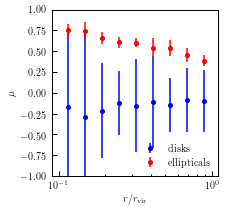

In [77]:
fig, ax = plt.subplots(1,1,figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1=ax.errorbar(rbin_centers, p_1, yerr=5*err_p_1, fmt='o', ms=4, color='blue')
p2=ax.errorbar(rbin_centers, p_2, yerr=5*err_p_2, fmt='o', ms=4, color='red')
ax.set_ylim([-1,1])
ax.set_xscale('log')
ax.set_xlim(0.09,1.1)
ax.set_xlabel(r'$r/r_{\rm vir}$')
ax.set_ylabel(r'$\mu$')
plt.legend([p1,p2],['disks','ellipticals'], frameon=False, loc='lower right', fontsize=10)
plt.show()

filename = "radial_satellite_alignment_strength.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/galaxy_shape_correlations/figures/'+filename, dpi=250)

# Alignment Correlations

In [27]:
from halotools.mock_observables.alignments import ee_3d, ed_3d

In [40]:
rbins = np.logspace(-1,1, 20)
rbin_centers = (rbins[:-1] + rbins[1:])/2.0

mask = (data['halos.m_star']>10**9)
print("number of haloes: ", np.sum(mask))

result_ee_1 = ee_3d(coords[mask], orientation_gal[mask], coords[mask], orientation_gal[mask], rbins, period=100.0)
result_ed_1 = ed_3d(coords[mask], orientation_gal[mask], coords[mask], rbins, period=100.0)

number of haloes:  56450


In [29]:
mask = (data['halos.m_star']>10**9) & disks
print("number of haloes: ", np.sum(mask))

result_ee_2 = ee_3d(coords[mask], orientation_gal[mask], coords[mask], orientation_gal[mask], rbins, period=100.0)
result_ed_2 = ed_3d(coords[mask], orientation_gal[mask], coords[mask], rbins, period=100.0)

number of haloes:  9200


In [30]:
mask = (data['halos.m_star']>10**9) & ellipticals
print("number of haloes: ", np.sum(mask))

result_ee_3 = ee_3d(coords[mask], orientation_gal[mask], coords[mask], orientation_gal[mask], rbins, period=100.0)
result_ed_3 = ed_3d(coords[mask], orientation_gal[mask], coords[mask], rbins, period=100.0)

number of haloes:  47241


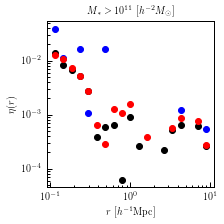

In [37]:
fig, axes = plt.subplots(1,1, sharex = True, sharey = True, figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax=axes
ax.set_title(r'$M_{*}>10^{11} ~[h^{-2}M_{\odot}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\eta(r)$')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
l2, = ax.plot(rbin_centers, result_ee_1, 'o', color='black')
l2, = ax.plot(rbin_centers, result_ee_2, 'o', color='blue')
l2, = ax.plot(rbin_centers, result_ee_3, 'o', color='red')
plt.show()

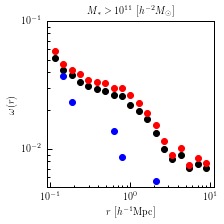

In [41]:
fig, axes = plt.subplots(1,1, sharex = True, sharey = True, figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
ax=axes
ax.set_title(r'$M_{*}>10^{11} ~[h^{-2}M_{\odot}]$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\omega(r)$')
ax.set_xlabel(r'$r~[h^{-1}{\rm Mpc}]$')
ax.set_ylim([0.005,0.1])
l2, = ax.plot(rbin_centers, result_ed_1, 'o', color='black')
l2, = ax.plot(rbin_centers, result_ed_2, 'o', color='blue')
l2, = ax.plot(rbin_centers, result_ed_3, 'o', color='red')
plt.show()

In [6]:
from astropy.table import Table

In [7]:
galaxy_table = Table()
galaxy_table['x'] = data['halos.x']
galaxy_table['y'] = data['halos.y']
galaxy_table['z'] = data['halos.z']
galaxy_table['halo_x'] = data['halos.x'][index_of_central]
galaxy_table['halo_y'] = data['halos.y'][index_of_central]
galaxy_table['halo_z'] = data['halos.z'][index_of_central]
galaxy_table['halo_mvir'] = data['halos.mass']
galaxy_table['type']='satellites'
galaxy_table['type'][centrals]='centrals'

In [11]:
from intrinsic_alignments.ia_models.ia_model_components import HaloMassCentralAlignmentStrength


central_elliptical_aligment_strength = HaloMassCentralAlignmentStrength()
central_disk_aligment_strength = HaloMassCentralAlignmentStrength(central_alignment_a=0.0, central_alignment_gamma=0.9)

central_disk_aligment_strength.assign_central_alignment_strength(halo_mvir=galaxy_table['halo_mvir'])
central_elliptical_aligment_strength.assign_central_alignment_strength(halo_mvir=galaxy_table['halo_mvir'])

0.617304244058
0.617304244058
0.617304244058
0.617304244058
0.617304244058
0.617304244058
0.617304244058
0.617304244058
0.617304244058
0.617304244058
0.617304244058
